In [1]:
"""Preprocesses data for training.

Preferrably, run using Jupyter Notebook.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read raw data from the excel file.
raw_data = pd.read_excel(
    "data/ouse93-96-raw-data.xlsx",
    index_col=0,
    header=1,
    usecols='A:I'
)

In [3]:
# Convert columns to float values. Turn non-numeric values into np.nan.
for column in raw_data.columns[1:]:
    raw_data[column] = pd.to_numeric(raw_data[column], errors='coerce')

In [4]:
# Convert negative values into np.nan.
raw_data = raw_data.mask(raw_data < 0, np.nan)

In [5]:
# Print all rows with NAN values.
raw_data[raw_data.isna().any(axis=1)]

,Crakehill,Skip Bridge,Westwick,Skelton,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme
1993-02-13,NaN,5.476,11.051,30.73,0.0,0.0,0.0,0.0
1993-03-15,NaN,2.546,7.179,18.06,11.2,0.0,86.0,19.2
1993-03-16,NaN,2.494,7.232,17.16,0.8,0.0,12.8,8.0
1993-04-07,22.90,4.159,26.603,NaN,2.4,0.0,0.0,3.2
1993-04-27,24.40,11.684,22.181,73.96,NaN,0.0,0.0,0.0
1995-03-01,80.60,19.096,100.761,174.00,17.6,NaN,51.2,21.6
1996-02-09,12.70,NaN,7.576,20.58,0.0,37.6,12.0,14.4
1996-04-18,7.61,NaN,13.918,16.84,0.8,4.8,47.2,32.0


In [6]:
# Calculate mean and standard deviation for each numeric column.
standard_deviations = raw_data.std()
means = raw_data.mean()

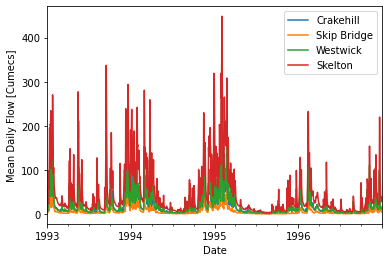

In [7]:
# Plot river flow columns.
raw_data[['Crakehill', 'Skip Bridge', 'Westwick', 'Skelton']].plot(xlabel="Date", ylabel="Mean Daily Flow [Cumecs]")
plt.savefig('figures/river-flow.png') 

In [8]:
# Find the values that lies the furthest from the mean from Mean Daily Flow columns.
skelton_max = raw_data['Skelton'].max()
print(raw_data['Skelton'].sort_values(ascending=False).head())
print((skelton_max - means['Skelton']) / standard_deviations['Skelton'])


1995-02-01    448.1
1995-02-02    362.3
1993-09-15    337.2
1995-01-29    319.6
1994-12-29    319.1
Name: Skelton, dtype: float64
7.197730720717447


1995-02-11    5000.0
Name: Arkengarthdale, dtype: float64
1995-02-28    9000.0
Name: East Cowton, dtype: float64
1996-01-10    80000.0
Name: Malham Tarn, dtype: float64


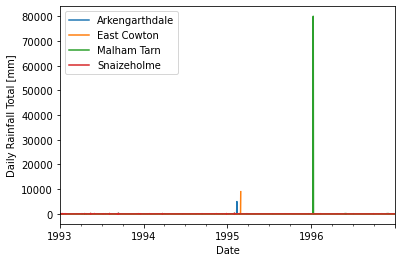

In [9]:
# Plot river flow columns.
raw_data[['Arkengarthdale', 'East Cowton', 'Malham Tarn', 'Snaizeholme']].plot(xlabel="Date", ylabel="Daily Rainfall Total [mm]")
plt.savefig('figures/rainfall.png')

print(raw_data['Arkengarthdale'].sort_values(ascending=False).head(1))
print(raw_data['East Cowton'].sort_values(ascending=False).head(1))
print(raw_data['Malham Tarn'].sort_values(ascending=False).head(1))

In [10]:
# Interpolate outliers.
for column in raw_data[['Arkengarthdale', 'East Cowton', 'Malham Tarn']].columns:
    column_values = raw_data[column]
    column_max_id = column_values.idxmax()
    column_values.loc[column_max_id] = np.nan

    """
    column_values = column_values.mask(
        column_values > means[column] + 3 * standard_deviations[column],
        np.nan
    )
    
    # If this is a river flow column, check the lower bound as well.
    if column in ['Crakehill', 'Skip Bridge', 'Westwick', 'Skelton']:
        column_values = column_values.mask(
            column_values < means[column] - 3 * standard_deviations[column],
            np.nan
        )
    raw_data[column] = column_values.interpolate(method="linear") 
    """

In [11]:
# Imputate spurious data.
raw_data = raw_data.interpolate(method="linear")

In [12]:
# Print all rows with NAN values.
raw_data[raw_data.isna().any(axis=1)]

,Crakehill,Skip Bridge,Westwick,Skelton,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme


In [13]:
# Print values interpolated for outliers.
print(raw_data.loc["1995-02-11", "Arkengarthdale"])
print(raw_data.loc["1995-02-28", "East Cowton"])
print(raw_data.loc["1996-01-10", "Malham Tarn"])


15.6
0.0
4.4


In [14]:
# Print all rows with NAN values.
raw_data[raw_data.isna().any(axis=1)]

,Crakehill,Skip Bridge,Westwick,Skelton,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme


In [15]:
# Split the data into into training-validation and test sets.
train_and_validation, test = train_test_split(raw_data, test_size=0.2)

# Calculate min and max values from training-validation set.
max_values = train_and_validation.max(axis=0)
min_values = train_and_validation.min(axis=0)
print(max_values)
print(min_values)

# Split training-validation set into training and validation sets.
train, validation = train_test_split(train_and_validation, test_size=0.25)
train

Crakehill         220.000
Skip Bridge        80.244
Westwick          374.061
Skelton           448.100
Arkengarthdale    121.600
East Cowton       145.600
Malham Tarn       252.000
Snaizeholme       268.800
dtype: float64
Crakehill         2.060
Skip Bridge       1.002
Westwick          1.954
Skelton           3.694
Arkengarthdale    0.000
East Cowton       0.000
Malham Tarn       0.000
Snaizeholme       0.000
dtype: float64


,Crakehill,Skip Bridge,Westwick,Skelton,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme
1994-12-05,70.40,19.581,61.497,151.70,10.4,16.8,36.8,15.2
1995-01-27,50.60,18.782,29.414,114.30,24.8,24.0,0.0,38.4
1995-11-29,10.20,1.901,10.690,22.97,0.8,0.8,3.2,0.8
1995-04-23,17.70,4.668,15.900,32.45,0.0,0.0,0.0,0.0
1996-10-20,7.82,2.820,15.329,22.18,10.4,12.8,54.4,32.8
...,...,...,...,...,...,...,...,...
1994-08-27,5.84,1.551,11.513,18.75,2.4,0.0,67.6,13.6
1994-11-28,12.00,5.187,12.636,32.22,0.0,0.0,0.0,0.0
1993-08-28,4.65,2.421,4.684,11.58,0.0,0.0,0.8,0.0
1994-04-24,34.20,5.951,31.540,80.79,0.0,0.0,1.6,2.4


In [16]:
def standardise(x: pd.Series, max_value: float, min_value: float):
    """Standardises data using minimum and maximum values.
    
    Args:
    x: A pandas.Series instance.
    max_value: A maximum value for the standardisation formula.
    min_value: A minimum value for the standardisation formula.
    """
    return 0.8 * ((x - min_value) / (max_value - min_value)) + 0.1
    
# Standardise the data.
standardised_data_sets = []
for data_set in [train, validation, test]:
    standardised_columns = []
    for column in data_set.columns:
        standardised_column = data_set.loc[:, column].apply(standardise, args=(max_values[column], min_values[column]))
        standardised_columns.append(standardised_column)
    standardised_data_set = pd.concat(standardised_columns, axis=1)
    standardised_data_sets.append(standardised_data_set)
        
train_standardised = standardised_data_sets[0]
validation_standardised = standardised_data_sets[0]
test_standardised = standardised_data_sets[0]
train_standardised

,Crakehill,Skip Bridge,Westwick,Skelton,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme
1994-12-05,0.350858,0.287567,0.228013,0.366434,0.168421,0.192308,0.216825,0.145238
1995-01-27,0.278177,0.279501,0.159037,0.299108,0.263158,0.231868,0.100000,0.214286
1995-11-29,0.129880,0.109076,0.118782,0.134700,0.105263,0.104396,0.110159,0.102381
1995-04-23,0.157410,0.137011,0.129983,0.151765,0.100000,0.100000,0.100000,0.100000
1996-10-20,0.121143,0.118354,0.128755,0.133278,0.168421,0.170330,0.272698,0.197619
...,...,...,...,...,...,...,...,...
1994-08-27,0.113875,0.105543,0.120551,0.127103,0.115789,0.100000,0.314603,0.140476
1994-11-28,0.136487,0.142250,0.122965,0.151351,0.100000,0.100000,0.100000,0.100000
1993-08-28,0.109507,0.114326,0.105869,0.114196,0.100000,0.100000,0.102540,0.100000
1994-04-24,0.217977,0.149963,0.163608,0.238785,0.100000,0.100000,0.105079,0.107143
